I was asked a question today about a typical way to present the error between a numerical scheme and an exact solution, and the convergence of the method.  I will demonstate one method that is typically used based on the $L_2$-norm of the error.

Consider the ODE

\begin{equation}
\frac{\rm{d}x}{\rm{d}t} = x(t) \quad x(0) = 1
\end{equation}

which has the analytic solution

\begin{equation}
x(t) = {\rm e}^t
\end{equation}

I'm too lazy to code up anything much more sophisticated, so let's use an backward-Euler explicit finite difference solution for $0 < t < 100$.  We'll write a function that computes the $L_2$ norm of the error between the discrete solution and the exact solution.  The formula for the norm is

$$
\Vert error \Vert_{2} = \frac{1}{N} \sqrt{ \sum_{i=1}^N(discrete(x_i) - exact(x_i))^2}
$$

In [1]:
import numpy as np

In [2]:
def finite_diff_solution_err(N):
    """
       Compute explicit finite difference solution and L2 error norm
       
       input: N - number of time steps
       output: normed error
    """
    
    t = np.linspace(0., 100., num=N)
    
    x = np.zeros_like(t)
    
    n = np.arange(N)
    
    x[0] = 1.0
    
    x[1:] = (1.0 + (t[1:] - t[:-1])) ** (n[1:] + 1) * x[0]
    
    exact = np.exp(t)
    
    err = np.linalg.norm(exact-x, ord=2) / N
    
    return err     

Now let's solve our problem for increasing degrees-of-freedom

In [3]:
dofs = np.array([10, 100, 1000, 10000, 100000])

errs = [ finite_diff_solution_err(i) for i in dofs]

Finally, we plot the results as a function of step size $h$

In [4]:
%matplotlib inline
import matplotlib.pyplot as plt

If we fit a straight line to the data, we get an estimate of the convergence rate of the method.

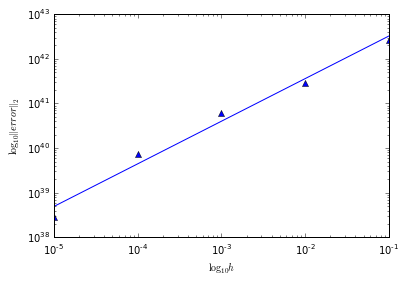

In [24]:
coefs = np.polyfit(np.log10(1 / dofs), np.log10(errs), 1)
y = 10 ** (coefs[0] * np.log10(1 / dofs) + coefs[1])

plt.loglog(1/dofs, y, 'b-')
plt.loglog(1/dofs, errs, 'b^')
plt.xlabel("$\log_{10} h$")
plt.ylabel("$\log_{10} \Vert error \Vert_{2}$")

The first term below is the slope of the least-square fit staight line.  So this method is roughly first order convergent.

In [22]:
coefs

array([  0.95413387,  43.4637998 ])